In [ ]:
import pandas as pd
import numpy as npf

In [ ]:
df=pd.read_csv('/content/titanic_toy.csv')

In [ ]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [ ]:
df.isna().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [ ]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [ ]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [ ]:
X=df.drop(['Survived'],axis=1)
y=df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train['age_99']=X_train['Age'].fillna(99)
X_train['age_minus']=X_train['Age'].fillna(-1)

X_train['fare_99']=X_train['Fare'].fillna(99)
X_train['fare_minus']=X_train['Fare'].fillna(-1)


In [ ]:
X_train

,Age,Fare,Family,age_99,age_minus,fare_99,fare_minus
30,40.0,27.7208,0,40.0,40.0,27.7208,27.7208
10,4.0,16.7000,2,4.0,4.0,16.7000,16.7000
873,47.0,9.0000,0,47.0,47.0,9.0000,9.0000
182,9.0,31.3875,6,9.0,9.0,31.3875,31.3875
876,20.0,9.8458,0,20.0,20.0,9.8458,9.8458
...,...,...,...,...,...,...,...
534,30.0,8.6625,0,30.0,30.0,8.6625,8.6625
584,NaN,8.7125,0,99.0,-1.0,8.7125,8.7125
493,71.0,49.5042,0,71.0,71.0,49.5042,49.5042
527,NaN,221.7792,0,99.0,-1.0,221.7792,221.7792


In [ ]:
print("Original Age :",X_train['Age'].var())
print("Age Variance after imputing 99 :",X_train['age_99'].var())
print("Age Variance after imputing -1 :",X_train['age_minus'].var())

print("Original Fare :",X_train['Fare'].var())
print("Fare Variance after imputing 99 :",X_train['fare_99'].var())
print("Fare Variance after imputing -1 :",X_train['fare_minus'].var())


Original Age : 204.34951339046142
Age Variance after imputing 99 : 951.7275570187188
Age Variance after imputing -1 : 318.0896202624488
Original Fare : 2448.1979137063163
Fare Variance after imputing 99 : 2536.0773428319703
Fare Variance after imputing -1 : 2378.5676784883494


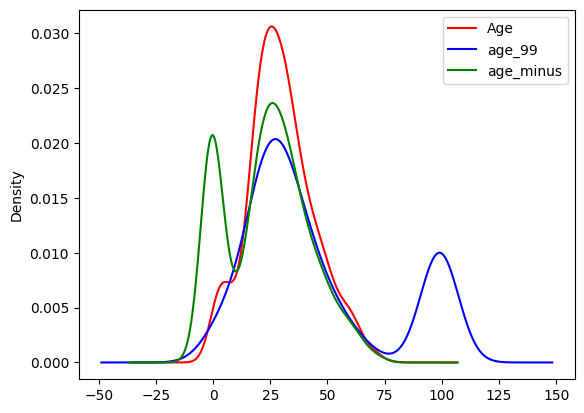

In [ ]:
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111)

X_train['Age'].plot(kind='kde',ax=ax,color='red')
X_train['age_99'].plot(kind='kde',ax=ax,color='blue')
X_train['age_minus'].plot(kind='kde',ax=ax,color='green')

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')


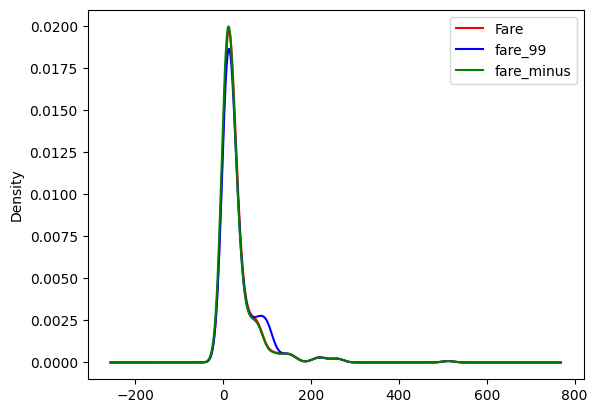

In [ ]:

fig=plt.figure()
ax=fig.add_subplot(111)

X_train['Fare'].plot(kind='kde',ax=ax,color='red')
X_train['fare_99'].plot(kind='kde',ax=ax,color='blue')
X_train['fare_minus'].plot(kind='kde',ax=ax,color='green')

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [ ]:
X_train.corr()

,Age,Fare,Family,age_99,age_minus,fare_99,fare_minus
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.095527,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.192723,0.205233
age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.064933,-0.062687
age_minus,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.143284,0.131514
fare_99,0.095527,1.000000,0.192723,-0.064933,0.143284,1.000000,0.902648
fare_minus,0.084585,1.000000,0.205233,-0.062687,0.131514,0.902648,1.000000


In [ ]:
X_train.cov()

,Age,Fare,Family,age_99,age_minus,fare_99,fare_minus
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,73.268412,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,16.051452,16.553989
age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-100.878826,-94.317400
age_minus,204.349513,125.558364,-4.149246,-189.535540,318.089620,128.692715,114.394141
fare_99,73.268412,2448.197914,16.051452,-100.878826,128.692715,2536.077343,2216.958409
fare_minus,63.321188,2448.197914,16.553989,-94.317400,114.394141,2216.958409,2378.567678


In [ ]:
X_train

,Age,Fare,Family,age_99,age_minus,fare_99,fare_minus
30,40.0,27.7208,0,40.0,40.0,27.7208,27.7208
10,4.0,16.7000,2,4.0,4.0,16.7000,16.7000
873,47.0,9.0000,0,47.0,47.0,9.0000,9.0000
182,9.0,31.3875,6,9.0,9.0,31.3875,31.3875
876,20.0,9.8458,0,20.0,20.0,9.8458,9.8458
...,...,...,...,...,...,...,...
534,30.0,8.6625,0,30.0,30.0,8.6625,8.6625
584,NaN,8.7125,0,99.0,-1.0,8.7125,8.7125
493,71.0,49.5042,0,71.0,71.0,49.5042,49.5042
527,NaN,221.7792,0,99.0,-1.0,221.7792,221.7792


# *Imputing using SKlearn* #

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
imp1=SimpleImputer(strategy='constant',fill_value=99)
imp2=SimpleImputer(strategy='constant',fill_value=-1)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
trf1=ColumnTransformer([
    ('imp1',imp1,['Age']),
    ('imp2',imp2,['Fare'])
],remainder='passthrough')

In [ ]:
trf1.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imp1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imp2',
                                 SimpleImputer(fill_value=-1,
                                               strategy='constant'),
                                 ['Fare'])])

In [ ]:
X_train=trf1.transform(X_train)
X_test=trf1.transform(X_test)


In [ ]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])